In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [113]:
def sigma(v):
    return 5e-20*np.sqrt(2*1.602e-19/m)/v
def vm(v):
    return n0*v*sigma(v)
def dvm(v):
    return 0#n0*sigma(v)

In [114]:
def a(v):
    return q**2*E**2/(3*vm(v)*m**2) + k*T0*vm(v)/m0
def b(v):
    return (2*vm(v)+v*dvm(v))*(k*T0/(m0*v)) +m*v*vm(v)/m0 +q**2*E**2*(2/v-dvm(v)/vm(v))/(3*m**2*vm(v)) #(k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return (m/m0)*(3*vm(v)+v*dvm(v))

In [115]:
def F(f,g,v):
    return g
def G(f,g,v):
    return -b(v)*g/a(v)-c(v)*f/a(v)

In [116]:
def Runge(n):
    B=np.zeros((n,1))
    A=np.zeros((n,n))

    vmin=4e3
    vmax=2*np.sqrt(24*1.602e-19/m)
    v=np.logspace(np.log10(vmin),np.log10(vmax),n)
    v=np.reshape(v,(n,1))

    dv=v[:n-1]-v[1:]#v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)


    f=np.zeros(n)
    g=-np.ones(n)
    for i in range(n-1,0,-1):
        k11=dv[i-1]*F(f[i],g[i],v[i])
        k21=dv[i-1]*G(f[i],g[i],v[i])
        k12=dv[i-1]*F(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
        k22=dv[i-1]*G(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
        k13=dv[i-1]*F(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
        k23=dv[i-1]*G(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
        k14=dv[i-1]*F(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
        k24=dv[i-1]*G(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
        f[i-1]=f[i]+(k11+2*k12+2*k13+k14)/6
        g[i-1]=g[i]+(k21+2*k22+2*k23+k24)/6
        norm=np.max(np.abs(f)) 
        f=f/norm
        g=g/norm

    #plt.semilogx(v,f)
    #plt.show()
    #plt.loglog(v,np.abs(g)+1e-17)
    #plt.show()


    f=np.reshape(f[:n-1],(n-1,1))
    g=np.reshape(g[:n-1],(n-1,1))
    dv=np.abs(dv)
    v=v[:n-1]

    f0=f/np.sum(f*dv) #Normalising f0

    #print(np.shape(dv))
    #plt.semilogx(v,f0)
    #plt.show()

    eps=np.sum(0.5*m*v**2*f0*dv)*3/1.602e-19
    #plt.semilogx(v,(v**2*f0*dv))
    #plt.show()

    f1=-q*E*g/(m*vm(v))/np.sum(f*dv) #Normalising f1
    #plt.semilogx(v,f1)
    #plt.show()

    W=np.sum(dv*f1*v)/1e4
    #plt.plot(dv*f1*v)
    #plt.show()
    return [eps,W]

In [117]:
n=np.logspace(1,3,25).astype(int)
print(n)
eps=np.zeros(25)
W=np.zeros(25)
for i in range(25):
    [eps[i],W[i]]=Runge(n[i])
W0=0.5931
eps0=0.72916
print(100*(1-W0/W),100*(1-eps0/eps))

[  10   12   14   17   21   26   31   38   46   56   68   82  100  121  146
  177  215  261  316  383  464  562  681  825 1000]
[ 8.13065108  7.23429811  4.94519718  3.54226976  2.40750957  1.74326155
  1.43096596  1.22942625  1.13203078  1.08285807  1.06155954  1.0542122
  1.05330701  1.05541832  1.05854633  1.06194238  1.06515537  1.0679842
  1.0703772   1.07240855  1.07410276  1.07551015  1.0766796   1.07764603
  1.07844702] [-46.52792003 -26.32634047 -17.26469118  -9.19394172  -4.26140561
  -1.60378365  -0.42751527   0.30732784   0.66251367   0.85233659
   0.94925878   0.99916642   1.02826464   1.04432955   1.05419545
   1.06094539   1.06577119   1.06935886   1.07210556   1.07430503
   1.07607816   1.07752258   1.07870943   1.07968398   1.08048876]


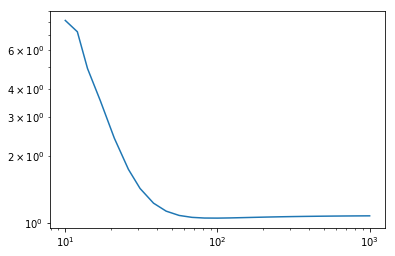

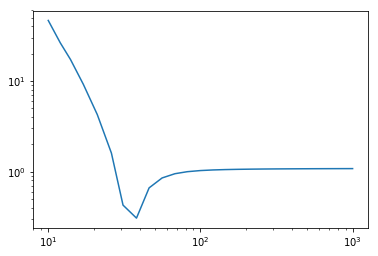

In [118]:
plt.loglog(n,100*np.abs(1-W0/W))
plt.show()
plt.loglog(n,100*np.abs(1-eps0/eps))
plt.show()

In [119]:
q**2*E**2*m0/(6*m*k**2*293**2*n0**2*sigma(2)**2)

8.6653874018019795e-09

In [120]:
q**2*E**2/(3*m**2*n0*sigma(2))

6.9524830852511166e-07

In [121]:
vmax

4108730.7646228252